# Регрессия

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$X$ - пространство объектов;<br>
$Y\in \mathcal{R}$ - пространство ответов;<br>
$y: X \rightarrow Y$ - неизвестная функция.

**Дано:**  
$\{x_1, \ldots, x_l\}\subset X$ - обучающая выборка (training sample);<br>
$y_i=y(x_i), i=1,\ldots,l$ - известные ответы.

**Найти:**<br>
$a: X \rightarrow Y$ - алгоритм, приближающий $y$ на всем множестве $X$.

#### Пример линейной регрессии

<img src="price.png" style="width: 365px;"/>

$$
price = a * square + b + \varepsilon
$$

$$
y = ax + b + \varepsilon
$$

$$
\sum_{i=1}^l(y_i - ax_i - b)^2\rightarrow\min_{a, b}
$$

Задача на нахождение глобального минимума.

$$
a = \frac{\overline{xy} - \overline{x}\overline{y}}{\overline{x^2} - \overline{x}^2}
$$

$$
b = \overline{y} - a\overline{x}
$$

<img src="price_reg.png" style="width: 365px;"/>

#### Общий случай

Матрица "объекты-признаки"
$$
X = \begin{pmatrix} f_1(x_1) & \ldots & f_n(x_1) \\ \ldots & \ldots & \ldots \\ f_1(x_l) & \ldots & f_n(x_l) \end{pmatrix}
$$
Вектор истинных ответов
$$
y = \begin{pmatrix} y_1 \\ \ldots \\ y_l \end{pmatrix}
$$
Вектор коэффициентов модели
$$
\alpha = \begin{pmatrix} \alpha_1 \\ \ldots \\ \alpha_n \end{pmatrix}
$$

$$
Q(a, X^l)=\sum_{i=1}^l\big(f(x_i, \alpha)-y_i\big)^2 = \big|\big|X\alpha -y\big|\big|^2\rightarrow\min_\alpha
$$

$$
\frac{\partial Q}{\partial \alpha}(\alpha)=2X^T(X\alpha-y)=0
$$

$$
X^TX\alpha=X^Ty
$$

$$
\alpha^* = (X^TX)^{-1}X^Ty=X^+y
$$

Проблема в том, что $X^TX$ может быть плохо обратима.

In [59]:
def plot_solution(A):
    np.random.seed(1)
    X = np.vstack((
        np.random.normal(loc=8.0, scale=.3, size=10),
        np.random.normal(loc=16.0, scale=.3, size=10)
    ))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.arrow(0., 0., A[0, 0], A[1, 0], fc="k", ec="k", head_width=0.3, head_length=0.5)
    ax1.arrow(0., 0., A[0, 1], A[1, 1], fc="k", ec="k", head_width=0.3, head_length=0.5)
    ax1.set_xlim(min(np.min(A[0]), 0) - 1, max(np.max(A[0]), 0) + 1)
    ax1.set_ylim(min(np.min(A[1]), 0) - 1, max(np.max(A[1]), 0) + 1)
    ax1.scatter(X[0], X[1]);
    solution = np.linalg.inv(A).dot(X)
    ax2.scatter(solution[0], solution[1]);

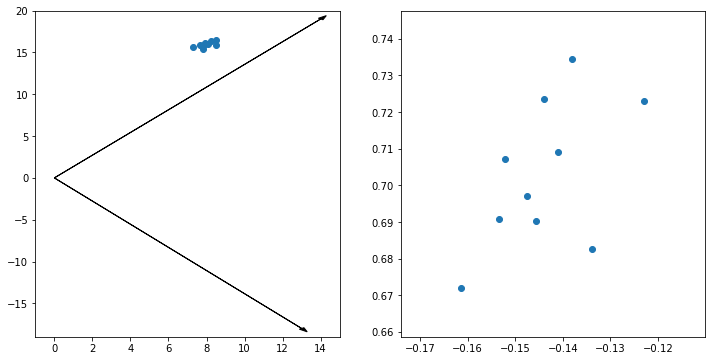

In [60]:
A = np.array([
    [13, 14],
    [-18, 19]
])
plot_solution(A)

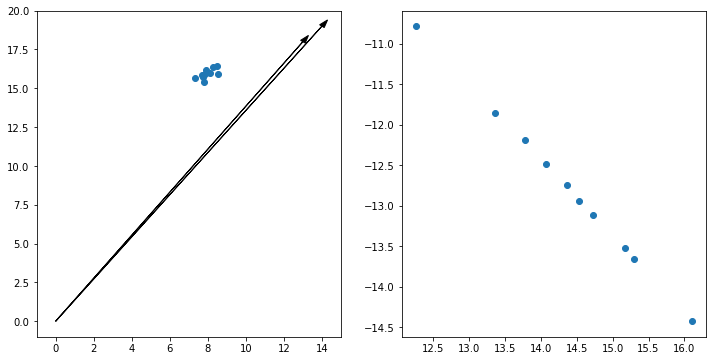

In [61]:
A = np.array([
    [13, 14],
    [18, 19]
])
plot_solution(A)

$$
X^+ = (USV^TVSU^T)^{-1}USV^T=US^{-1}V^T=\sum_{j=1}^n\frac{1}{\sqrt{\lambda_j}}u_jv_j^T
$$
$$
\alpha^* = X^+y = US^{-1}V^Ty=\sum_{j=1}^n\frac{1}{\sqrt{\lambda_j}}u_j(v_j^Ty)
$$
$$
\big|\big|\alpha^*\big|\big|^2 = \big|\big|S^{-1}V^Ty\big|\big|^2 =\sum_{j=1}^n\frac{1}{\lambda_j}(v_j^Ty)^2
$$

Число обусловленности

$$
\mu(S) = \frac{\lambda_\max}{\lambda_\min}
$$

Если матрица $C=X^TX$ плохо обусловлена, то:

1) решение неустойчиво и плохо интерпретируемо;<br>
2) $\big|\big|\alpha^*\big|\big|$ велико;<br>
3) возникает переобучение.

Решение проблемы:

1) регуляризация: $\big|\big|\alpha\big|\big|\rightarrow\min$;<br>
2) отбор признаков: $f_1, \ldots, f_n\rightarrow f_{j_1},\ldots, f_{j_m}$, $m\ll n$;<br>
3) преобразование признаков: $f_1,\ldots,f_n\rightarrow g_1, \ldots, g_m$, $m\ll n$.

## Регуляризация

Вместо

$$
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2\rightarrow\min_\alpha
$$

будем рассматривать

$$
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2 + \lambda\big|\big|\alpha\big|\big|^2\rightarrow\min_\alpha
$$

Тогда вместо

$$
\big|\big|\alpha^*\big|\big|^2 = \big|\big|S^{-1}V^Ty\big|\big|^2 =\sum_{j=1}^n\frac{1}{\lambda_j}(v_j^Ty)^2
$$

получим

$$
\big|\big|\alpha^*\big|\big|^2 = \big|\big|(S^2+\tau I_n)^{-1}SV^Ty\big|\big|^2 =\sum_{j=1}^n\frac{\lambda_j}{(\lambda_j+\tau)^2}(v_j^Ty)^2
$$

#### Виды регуляризации

* [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
$$
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2 + \lambda\big|\big|\alpha\big|\big|_2^2\rightarrow\min_\alpha
$$

* [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
$$
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2 + \lambda\big|\big|\alpha\big|\big|_1\rightarrow\min_\alpha
$$

* [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
$$
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2 + \lambda\big(\beta\big|\big|\alpha\big|\big|_2^2 + (1-\beta) \big|\big|\alpha\big|\big|_1\big)\rightarrow\min_\alpha, \beta\in[0, 1]
$$

**Ridge**

<img src="ridge.png" style="width: 365px;"/>

**Lasso**

<img src="lasso.png" style="width: 365px;"/>

**Ridge**

Вместо 

$$
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2 + \lambda\big|\big|\alpha\big|\big|_2^2\rightarrow\min_\alpha
$$

можно рассматривать

$$
\begin{cases}
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2 \rightarrow \min_\alpha \\
\big|\big|\alpha\big|\big|_2^2 \lt \eta
\end{cases}
$$

**Lasso**

Вместо 

$$
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2 + \lambda\big|\big|\alpha\big|\big|_1\rightarrow\min_\alpha
$$

можно рассматривать

$$
\begin{cases}
Q(a, X^l)= \big|\big|X\alpha -y\big|\big|^2 \rightarrow \min_\alpha \\
\big|\big|\alpha\big|\big|_1 \lt \eta
\end{cases}
$$

<img src="levels.gif" style="width: 500px;"/>

<img src="reg.png" style="width: 500px;"/>

## Оценка качества работы регрессионной модели

#### Линейная зависимость

<img src="quality.png" style="width: 500px;"/>

<img src="var.png" style="width: 500px;"/>

$\bar{y}$ - среднее значение, $\hat{y}_i$ - моделируемое значение, $y_i$ - наблюдаемое значение.

#### Объясненная и необъясненная дисперсия

**SST** = *total sum of squares*<br>
	сумма квадратов отклонений наблюдений от 
	среднего значения наблюдений
    
**SSE** = *error sum of squares*<br>
	сумма квадратов отклонений наблюдений от
	моделируемых значений 
    
**SSR** = *regression sum of squares*<br>
	сумма квадратов отклонений моделируемых значений от
    среднего значения наблюдений

Коэффициент определенности (R-squared)

$$
R^2 = \frac{SSR}{SST}
$$

<img src="r_squared.png" style="width: 500px;"/>

## Полиномиальная регрессия

**Пример**

<img src="poly.png" style="width: 700px;"/>

В качестве признаков можно иcпользовать $f_i^2(x_k),\ f_i^3(x_k),\ f_i(x_k)f_j(x_k),\ \ldots$ - произведения степеней признаков.

[Реализация](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)

Можно добавлять и другие признаки: sin, cos, exp, log, ...

**Полиномиальная регрессия степени 2**

<img src="deg2.png" style="width: 200px;"/>

**Полиномиальная регрессия степени 5**

<img src="deg5.png" style="width: 200px;"/>

**Полиномиальная регрессия степени 5**

<img src="deg5_overfit.png" style="width: 200px;"/>

Переобучение!

**Полиномиальная регрессия степени 5 с регуляризацией**

<img src="deg5_reg.png" style="width: 200px;"/>

## Прочие алгоритмы регрессии

[SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

<img src="svm.png" style="width: 400px;"/>

Штрафуем за выход из "трубки".

$$
h_\varepsilon(x)=
\begin{cases}
0, &\text{if}\ |x|<\varepsilon  \\
|x|, &\text{else}
\end{cases}
$$

$$
C\sum_{i=1}^lh_\varepsilon(\xi_- + \xi_+)+\frac{1}{2}||w||^2 \rightarrow \min_{w,w_0},
$$

где $\xi_-$ - отступ ниже линии, $\xi_+$ - отступ выше линии.

[kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Берем среднее значение по соседям.

[Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Берем среднее значение по элементам обучающей выборки, попавшей в лист.

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Берем среднее значение по предсказаниям каждого дерева.